# The Socrata API

## Lecture objectives

1. Learn how to use the Socrata API
2. More practice with `pandas`, `geopandas`, and plotting


### Socrata
Many cities, other government agencies, and nonprofit organizations make their data available through the Socrata API. The City of Los Angeles is one user. [You can browse the city's datasets here](https://data.lacity.org).

Just like the census, you can call Socrata APIs with `requests`, but there is also a dedicated package, `sodapy`.

[Look at the housing dataset here](https://data.lacity.org/Housing-and-Real-Estate/HCIDLA-Affordable-Housing-Projects-List-2003-to-Pr/mymu-zi3s). Click on the API button in the top right corner. You can see much useful information:

* The URL (the API endpoint)
* The format (JSON is the default)
* Some helpful links

Let's copy and paste the API endpoint, and use `requests`. 

In [1]:
import requests
import pandas as pd
import json

url = 'https://data.lacity.org/resource/mymu-zi3s.json'
r = requests.get(url)
df = pd.DataFrame(json.loads(r.text))
df

,apn,project_number,name,development_stage,construction_type,address,council_district,site_cd,community,site_units,...,latitude,geocoded_column,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,jobs,contract_numbers
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,...,34.05209,"{'type': 'Point', 'coordinates': [-118.26681, ...",23078,564,1047,54,11,76,NaN,NaN
1,5537023034,70159,HARVARD CIRCLE,In-Service,NEW CONSTRUCTION,"952 N HARVARD BLVD 1-40 LOS ANGELES, CA 90029",13,1,MELROSE,40,...,34.0884,"{'type': 'Point', 'coordinates': [-118.30371, ...",23447,439,929,NaN,8,58,142,C-113118
2,6032019034,14-121272,MARTHA BRYANT MANOR- RECAP,In-Service,ACQUISITION + REHAB,"8300 S HOOVER ST Los Angeles, CA 90044",8,1,VERMONT VISTA,77,...,33.96297,"{'type': 'Point', 'coordinates': [-118.28691, ...",23675,783,1005,7,14,45,NaN,NaN
3,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,34.03071,"{'type': 'Point', 'coordinates': [-118.34182, ...",23077,668,925,7,12,17,NaN,NaN
4,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,34.01115,"{'type': 'Point', 'coordinates': [-118.25748, ...",22727,712,892,7,13,6,226,C-129358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2604028031,19-125927,SILVA CROSSING (FKA LINK AT SYLMAR),Development,NEW CONSTRUCTION,"12667 SAN FERNANDO ROAD Sylmar, CA 91342",7,1,SYLMAR,56,...,34.29927,"{'type': 'Point', 'coordinates': [-118.45975, ...",18912,51,642,NaN,1,47,234,C-137141
540,5149010949,18-124964,GRAND AVENUE PARCEL Q APTS.,Development,DEMO/NEW CONSTRUCTION,"100 S GRAND AVE Los Angeles, CA 90012",14,1,DOWNTOWN,323,...,34.0549,"{'type': 'Point', 'coordinates': [-118.24805, ...",22728,543,1183,37,9,76,NaN,NaN
541,5114014004,14-121652,FLORENCE MILLS (SITE 4),In-Service,NEW CONSTRUCTION,"3509 S CENTRAL AVE LOS ANGELES, CA 90011",9,4,CENTRAL,0,...,34.01136,"{'type': 'Point', 'coordinates': [-118.2567, 3...",22727,712,892,7,13,6,226,C-129358
542,5183005010,09-117211,LAS MARGARITAS (SITE 2),In-Service,BOTH REHAB AND NEW CONSTRUCTION,"115 N SOTO ST Los Angeles, CA 90033",14,2,BOYLE HEIGHTS,0,...,34.04422,"{'type': 'Point', 'coordinates': [-118.20967, ...",23450,522,350,NaN,9,38,121,C-117254


We might have expected some geographic coordinates, and it looks like they are in the `geocoded_column` column.

We converted it to a regular `pandas` DataFrame, which doesn't understand spatial relationships. So how do we make the geometries readily available?

Looking back at the [webpage](https://data.lacity.org/Housing-and-Real-Estate/HCIDLA-Affordable-Housing-Projects-List-2003-to-Pr/mymu-zi3s), the API also gives us a `geojson` option. How do we make use of this? Fortunately, the `geopandas.read_file()` function can read in the URL directly, without going through `requests`.

Let's read the dataset into a `geoDataFrame` and call it `gdf`. Note that it gives us a `geometry` column with point locations.

In [2]:
import geopandas as gpd
url = 'https://data.lacity.org/resource/mymu-zi3s.geojson'
gdf = gpd.read_file(url)
gdf

,site_units,tax_exempt_conduit_bond,community,development_stage,name,leverage,latitude,photo,project_number,developer,...,contract_numbers,address,apn,project_total_units,housing_type,management_company,supportive_housing,council_district,tdc,geometry
0,196,0,WESTLAKE,In-Service,SAN LUCAS APARTMENTS,0,34.05209,{'url': 'http://hcidapp.lacity.org/mpphotos/Im...,02-118256,N/A,...,None,"1221 W 7TH ST Los Angeles, CA 90017",5143020023,196,SENIORS,GSL PROPERRTY MANAGEMENT,No,1,0,POINT (-118.26681 34.05209)
1,40,0,MELROSE,In-Service,HARVARD CIRCLE,16436770,34.0884,{'url': 'http://hcidapp.lacity.org/mpphotos/07...,70159,N/A,...,C-113118,"952 N HARVARD BLVD 1-40 LOS ANGELES, CA 90029",5537023034,40,FAMILY,FPI MANAGEMENT INC.,No,13,23222387,POINT (-118.30371 34.08840)
2,77,4410000,VERMONT VISTA,In-Service,MARTHA BRYANT MANOR- RECAP,7558174,33.96297,{'url': 'http://hcidapp.lacity.org/mpphotos/Im...,14-121272,"BARKER MANAGEMENT, INC.",...,None,"8300 S HOOVER ST Los Angeles, CA 90044",6032019034,77,FAMILY,"LEVINE MANAGEMENT GROUP, INC.",No,8,11968174,POINT (-118.28691 33.96297)
3,0,10208936,CRENSHAW DISTRICT,In-Service,LEEWARD APTS. (SITE 7),7103994,34.03071,{'url': 'http://hcidapp.lacity.org/mpphotos/Im...,05-117193,"HAMPSTEAD PARTNERS, INC.",...,None,"2809 S WEST BLVD Los Angeles, CA 90016",5050011005,257,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,10,17312930,POINT (-118.34182 34.03071)
4,0,0,CENTRAL,In-Service,FLORENCE MILLS (SITE 5),36081992,34.01115,{'url': 'http://hcidapp.lacity.org/mpphotos/Im...,14-121652,Hollywood Community Housing Corporation,...,C-129358,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",5114014020,74,SPECIAL NEEDS,BARKER MANAGEMENT INCORPORATED,Yes,9,45471107.63,POINT (-118.25748 34.01115)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,56,0,SYLMAR,Development,SILVA CROSSING (FKA LINK AT SYLMAR),21433533,34.29927,{'url': 'http://hcidapp.lacity.org/mpphotos/Im...,19-125927,Meta Housing Corporation,...,C-137141,"12667 SAN FERNANDO ROAD Sylmar, CA 91342",2604028031,56,SPECIAL NEEDS,THE JOHN STEWART COMPANY,Yes,7,30533533,POINT (-118.45975 34.29927)
540,323,184260433,DOWNTOWN,Development,GRAND AVENUE PARCEL Q APTS.,38757673,34.0549,{'url': 'http://hcidapp.lacity.org/mpphotos/Im...,18-124964,"Grand Avenue Parcel Q Developer, LLC",...,None,"100 S GRAND AVE Los Angeles, CA 90012",5149010949,323,FAMILY,N/A,No,14,223018106,POINT (-118.24805 34.05490)
541,0,0,CENTRAL,In-Service,FLORENCE MILLS (SITE 4),36081992,34.01136,{'url': 'http://hcidapp.lacity.org/mpphotos/Im...,14-121652,Hollywood Community Housing Corporation,...,C-129358,"3509 S CENTRAL AVE LOS ANGELES, CA 90011",5114014004,74,SPECIAL NEEDS,BARKER MANAGEMENT INCORPORATED,Yes,9,45471107.63,POINT (-118.25670 34.01136)
542,0,0,BOYLE HEIGHTS,In-Service,LAS MARGARITAS (SITE 2),14135658,34.04422,{'url': 'http://hcidapp.lacity.org/mpphotos/09...,09-117211,East L.A. Community Corporation,...,C-117254,"115 N SOTO ST Los Angeles, CA 90033",5183005010,42,FAMILY,THE JOHN STEWART COMPANY,No,14,14695419,POINT (-118.20967 34.04422)


We can check to see what projection it is in using the `crs` attribute. Then, we can plot the data.

In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

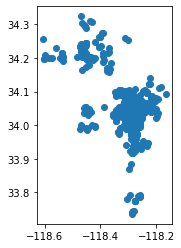

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdf.plot(ax=ax)

Before we clean up the map, let's mention two others way to read that data in–using the Socrata API.

#### Sodapy

We won't cover the [`sodapy` library](https://pypi.org/project/sodapy/) here, but it can be simpler for some types of dataset.

#### Save to disk
You can always point and click on the webpage, download the file to your computer, and load it in.

Socrata gives you [various options for the format for this file](https://data.lacity.org/Housing-and-Real-Estate/HCIDLA-Affordable-Housing-Projects-List-2003-to-Pr/mymu-zi3s): `csv`, `shp`, and so on. Let's use the shapefile version.

In [8]:
# change this to whereever you download files on your computer
download_path = '/Users/stephandrade/Desktop/'
gpd.read_file(download_path+'LAHD Affordable Housing Projects List (2003 to Present)')

DriverError: /Users/stephandrade/Desktop/LAHD Affordable Housing Projects List (2003 to Present): No such file or directory

Now let's clean up the map. First, note that we can call `gdf.plot()` directly, but we have more flexibility if we create our own figure and axis object using `plt.subplots()`.

Let's also plot the data in a particular column, perhaps `site_units`, as a proportional circle.

And finally, let's use `contextily` to provide a basemap.

[]

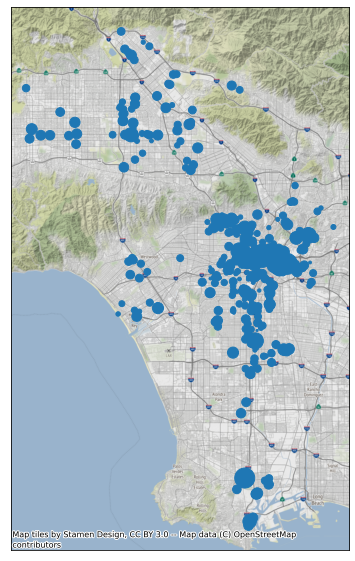

In [6]:
import matplotlib.pyplot as plt
import contextily as ctx
# If we try to plot site_units, we get an error due to the zero-unit entries. Let's solve that first.
gdf['site_units'] = gdf.site_units.astype(int)  # convert to integer

fig, ax = plt.subplots(figsize=(10,10))

# basemaps are typically in Web Mercator (projection 3857), so we need to reproject our dataframe to this
gdf[gdf.site_units>0].to_crs('EPSG:3857').plot(markersize='site_units', ax=ax)

# let's add a basemap using the contextily library. The zoom was trial and error
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])

<div class="alert alert-block alert-info">
<h3>Key Takeaways</h3>
<ul>
  <li>Government open data sites often use Socrata.</li>
  <li>The data format is usually well documented, and there are several options to import it to Python.</li>
  <li>When importing geospatial data, pay attention to the projection.</li>
</ul>
</div>